<a href="https://colab.research.google.com/github/sahiiljadhav/nlp-text-processing-tfidf-wordcloud/blob/main/nlp_text_processing_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
def tokenize(text):
    return nltk.word_tokenize(text.lower())

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words and word.isalpha()]

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess(text):
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    return lemmatize(tokens)

preprocessed_sentences = [preprocess(sentence) for sentence in sentences]
print("Preprocessed Sentences:")
for sentence in preprocessed_sentences:
    print(sentence)

flat_tokens = [word for sentence in preprocessed_sentences for word in sentence]
frequency_dict = dict(Counter(flat_tokens))
print("\nFrequency Dictionary:")
print(frequency_dict)

unique_words = list(frequency_dict.keys())

def create_word_presence_matrix(sentences, unique_words):
    matrix = []
    for sentence in sentences:
        row = [1 if word in sentence else 0 for word in unique_words]
        matrix.append(row)
    return matrix


presence_matrix = create_word_presence_matrix(preprocessed_sentences, unique_words)

print("\nWord Presence Matrix:")
print(f"Unique Words: {unique_words}")
for i, row in enumerate(presence_matrix):
    print(f"Sentence {i+1}: {row}")


Preprocessed Sentences:
['news', 'mentioned', 'fake', 'news']
['audience', 'encourage', 'awareness']
['false', 'information', 'often', 'misleading', 'news']

Frequency Dictionary:
{'news': 3, 'mentioned': 1, 'fake': 1, 'audience': 1, 'encourage': 1, 'awareness': 1, 'false': 1, 'information': 1, 'often': 1, 'misleading': 1}

Word Presence Matrix:
Unique Words: ['news', 'mentioned', 'fake', 'audience', 'encourage', 'awareness', 'false', 'information', 'often', 'misleading']
Sentence 1: [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Sentence 2: [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
Sentence 3: [1, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [3]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
sentences = [
    "The news mentioned was fake news.",
    "The audience will encourage awareness.",
    "False information is often misleading news."
]

In [7]:
flat_tokens = [word for sentence in preprocessed_sentences for word in sentence]
frequency_dict = dict(Counter(flat_tokens))

# Print the frequency of words
print("Frequency Dictionary (Unique Words Sorted):")
for word, freq in sorted(frequency_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{word}: {freq}")

Frequency Dictionary (Unique Words Sorted):
news: 3
mentioned: 1
fake: 1
audience: 1
encourage: 1
awareness: 1
false: 1
information: 1
often: 1
misleading: 1


In [8]:
import math

# Calculate Term Frequency (TF)
def calculate_tf(sentence):
    tf = {}
    total_words = len(sentence)
    word_count = dict(Counter(sentence))
    for word, count in word_count.items():
        tf[word] = count / total_words
    return tf

tf_dicts = [calculate_tf(sentence) for sentence in preprocessed_sentences]
print("\nTerm Frequency (TF) for each sentence:")
for idx, tf in enumerate(tf_dicts):
    print(f"Sentence {idx + 1}: {tf}")


def calculate_idf(sentences, unique_words):
    N = len(sentences)  # Total number of sentences
    idf = {}
    for word in unique_words:
        df = sum(1 for sentence in sentences if word in sentence)  # Document frequency
        idf[word] = math.log(N / (df + 1))  # Avoid division by zero
    return idf

unique_words = list(frequency_dict.keys())

idf_dict = calculate_idf(preprocessed_sentences, unique_words)
print("\nInverse Document Frequency (IDF):")
for word, idf_value in idf_dict.items():
    print(f"{word}: {idf_value}")



Term Frequency (TF) for each sentence:
Sentence 1: {'news': 0.5, 'mentioned': 0.25, 'fake': 0.25}
Sentence 2: {'audience': 0.3333333333333333, 'encourage': 0.3333333333333333, 'awareness': 0.3333333333333333}
Sentence 3: {'false': 0.2, 'information': 0.2, 'often': 0.2, 'misleading': 0.2, 'news': 0.2}

Inverse Document Frequency (IDF):
news: 0.0
mentioned: 0.4054651081081644
fake: 0.4054651081081644
audience: 0.4054651081081644
encourage: 0.4054651081081644
awareness: 0.4054651081081644
false: 0.4054651081081644
information: 0.4054651081081644
often: 0.4054651081081644
misleading: 0.4054651081081644


In [9]:
def calculate_document_vector(tf, idf):
    vector = {}
    for word, tf_value in tf.items():
        if word in idf:
            vector[word] = tf_value * idf[word]
    return vector

document_vectors = [calculate_document_vector(tf, idf_dict) for tf in tf_dicts]
print("\nDocument Vectors (TF * IDF):")
for idx, vector in enumerate(document_vectors):
    print(f"Sentence {idx + 1}: {vector}")


Document Vectors (TF * IDF):
Sentence 1: {'news': 0.0, 'mentioned': 0.1013662770270411, 'fake': 0.1013662770270411}
Sentence 2: {'audience': 0.13515503603605478, 'encourage': 0.13515503603605478, 'awareness': 0.13515503603605478}
Sentence 3: {'false': 0.08109302162163289, 'information': 0.08109302162163289, 'often': 0.08109302162163289, 'misleading': 0.08109302162163289, 'news': 0.0}


In [10]:
import nltk
import math
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Example text (list of sentences)
sentences = [
    "The news mentioned here is fake.",
    "Audience do not encourage fake news.",
    "Fake news is false or misleading."
]

# Preprocess text: tokenization, stop word removal, and lemmatization
def preprocess(text):
    # Tokenize text and convert to lowercase
    tokens = nltk.word_tokenize(text.lower())
    # Remove stop words and non-alphabetical tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to each sentence
preprocessed_sentences = [preprocess(sentence) for sentence in sentences]

# Step 1: Create a frequency dictionary of unique words across all sentences
flat_tokens = [word for sentence in preprocessed_sentences for word in sentence]
unique_words = list(set(flat_tokens))  # List of all unique words

# Step 2: Calculate Term Frequency (TF)
def calculate_tf(sentence):
    tf = {}
    total_words = len(sentence)
    word_count = dict(Counter(sentence))
    for word, count in word_count.items():
        tf[word] = count / total_words
    return tf

# Calculate TF for each sentence
tf_dicts = [calculate_tf(sentence) for sentence in preprocessed_sentences]

# Step 3: Calculate Inverse Document Frequency (IDF)
def calculate_idf(sentences, unique_words):
    N = len(sentences)  # Total number of sentences
    idf = {}
    for word in unique_words:
        df = sum(1 for sentence in sentences if word in sentence)  # Document frequency
        idf[word] = math.log(N / (df + 1))  # Avoid division by zero
    return idf

# Calculate IDF for each word
idf_dict = calculate_idf(preprocessed_sentences, unique_words)

# Step 4: Calculate Document Vectors (BoW with TF-IDF)
def calculate_document_vector(tf, idf):
    vector = {}
    for word, tf_value in tf.items():
        if word in idf:
            vector[word] = tf_value * idf[word]
    return vector

# Calculate document vectors for each sentence (BoW with TF-IDF)
document_vectors = [calculate_document_vector(tf, idf_dict) for tf in tf_dicts]

# Display results
print("\nUnique Words:", unique_words)
print("\nDocument Vectors (BoW with TF-IDF):")
for idx, vector in enumerate(document_vectors):
    print(f"Sentence {idx + 1}: {vector}")


Unique Words: ['audience', 'encourage', 'false', 'news', 'mentioned', 'fake', 'misleading']

Document Vectors (BoW with TF-IDF):
Sentence 1: {'news': -0.09589402415059363, 'mentioned': 0.13515503603605478, 'fake': -0.09589402415059363}
Sentence 2: {'audience': 0.1013662770270411, 'encourage': 0.1013662770270411, 'fake': -0.07192051811294523, 'news': -0.07192051811294523}
Sentence 3: {'fake': -0.07192051811294523, 'news': -0.07192051811294523, 'false': 0.1013662770270411, 'misleading': 0.1013662770270411}


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
pip install wordcloud matplotlib

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Sample text corpus
text_corpus = """

A Pune-based patient has died after contracting Guillain-Barré Syndrome (GBS), making it the first suspected death in Maharashtra due to the disease. He passed away in Maharashtra’s Solapur district, where he was visiting his native village for personal work. Meanwhile, the over 100 cases of GBS have now been recorded in Pune.

The deceased had symptoms of cold, cough, experienced breathing difficulties and was hospitalised for same on January 18 in a private hospital in Solapur. He was first placed in the ICU ward but later shifted to a regular room after showing improvement. However, his health started deteriorating with difficulty in breathing and he later passed away in the hospital’s ICU unit where he had been readmitted. The deceased also experienced paralysis in his limbs, prior to his demise.

“A 40-year-old patient died at a private hospital and was brought to us for post-mortem. According to the preliminary report the patient’s death appears to be due to Guillain-Barré Syndrome (GBS),” said Dr. Sanjeev Thakur, Dean of Government Medical College, Solapur.

“I checked his clinical history, he had suspected GBS. Despite being on treatment for five days, he has succumbed. Along with medical postmotem, we decided to do clinical PM. Clinical PM is done to understand the exact cause of death. We involved two biologist and pathologist also, team of four carried out the autopsy. The clinical report and autopsy report prima facia suggest cause of death is GBS,” he added.

“To further confirm this, cerebrospinal fluid (CSF), and blood samples have been sent for polymerase chain reaction. The exact reason we will come to know after microbiological and Histopathology reports are out. It will take 5 to 6 days for report to come.Cases in Pune cross 100
“The total number of GBS cases in Pune on Sunday increased to 101, comprising 68 males and 33 females. Of these, 16 patients are on ventilator support. One suspected death has been reported in Solapur,” the State health department official said.
Meanwhile, the Rapid Response Team (RRT) and the Pune Municipal Corporation’s health department continued surveillance in the affected Sinhgad Road areas.

A total of 25,578 houses have been surveyed so far, including 15,761 in the Pune Municipal Corporation limits, 3,719 in Chinchwad Municipal Corporation limits, and 6,098 houses in the district’s rural areas, the official said.What is Guillain-Barré Syndrome?
Guillain-Barré Syndrome (GBS) is an autoimmune neurological disorder in which a person’s immune system attacks their peripheral nerves, leading to muscle weakness that can progress to paralysis. It can develop over a few days or several weeks. People of any age can be affected, but it is more common in adults and males. The condition is rare, with an estimated incidence of 1/2 per 100,000 population.
"""

In [13]:
# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    width=800,
    height=400,
    max_words=200,
    colormap='Oranges'   # viridis', 'plasma', 'inferno', 'magma', 'cividis','berlin', 'managua', 'vanimo', twilight', 'twilight_shifted', 'hsv'
                        # 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                        # 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                        # 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool','Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'
                        #  PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu','RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
).generate(text_corpus)

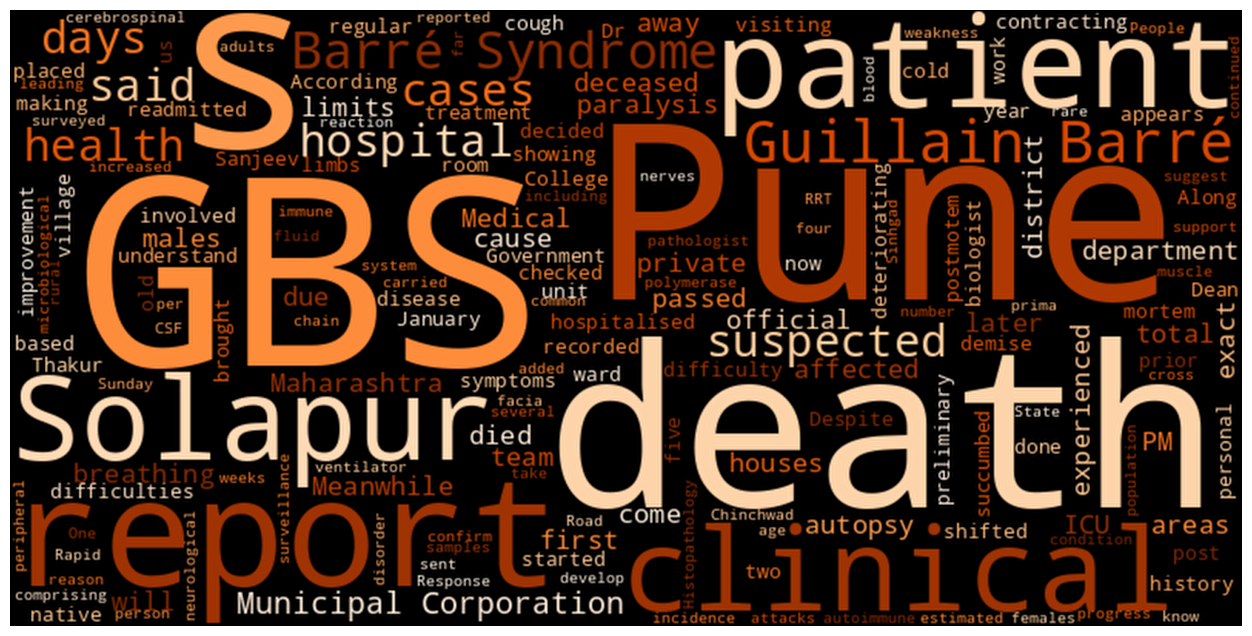

In [14]:
# Display the generated word cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bessel')
                # 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser',
                # 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell','sinc', 'lanczos'
plt.axis('off')  # Hide axes
plt.show()